In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt # for data visualization
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("zalando-research/fashionmnist")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/fashionmnist


In [3]:
df_train = pd.read_csv('/kaggle/input/fashionmnist/fashion-mnist_train.csv')

shuffle_index = np.random.permutation(df_train.shape[0])
df_train = df_train.iloc[shuffle_index]

df_test = pd.read_csv('/kaggle/input/fashionmnist/fashion-mnist_test.csv')

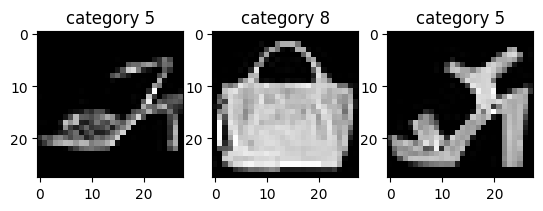

In [4]:
samples = np.random.randint(0, df_train.shape[0], 3)
for i, idx in enumerate(samples):
    sample = np.reshape(df_train.iloc[idx, 1:].values/255, (28, 28))
    plt.subplot(2, 3, i+1)
    plt.title('category {}'.format(df_train.iloc[idx, 0]))
    plt.subplots_adjust(top=1, bottom=0.1)
    plt.imshow(sample, 'gray')

In [5]:

train_data, val_data = train_test_split(df_train.iloc[:, 1:], test_size=0.2, random_state=42)
train_data, val_data = train_data/255, val_data/255 # normalize training and validation data
train_label, val_label = train_test_split(df_train.iloc[:, 0], test_size=0.2, random_state=42)

test_data = df_test.iloc[:, 1:]
test_label = df_test.iloc[:, 0]
test_data /= 255 # normalize test data


train_label_cat = to_categorical(train_label)
val_label_cat = to_categorical(val_label)
test_label_cat = to_categorical(test_label)

In [6]:
clf = RandomForestClassifier(n_estimators=100, max_depth = 50,
                                criterion='entropy', n_jobs=-1)
clf.fit(train_data, train_label_cat)

RandomForestClassifier(criterion='entropy', max_depth=50, n_jobs=-1)

In [8]:
label_names = [f'Class-{i}' for i in range(1, 11)]

# If y_pred_rf is a one-hot encoded matrix
y_pred_rf_vec = y_pred_rf.argmax(axis=1)

print(classification_report(test_label, y_pred_rf_vec, target_names=label_names))
print(accuracy_score(test_label, y_pred_rf_vec))

              precision    recall  f1-score   support

     Class-1       0.46      0.96      0.62      1000
     Class-2       1.00      0.95      0.97      1000
     Class-3       0.89      0.71      0.79      1000
     Class-4       0.95      0.86      0.90      1000
     Class-5       0.86      0.76      0.81      1000
     Class-6       0.99      0.91      0.95      1000
     Class-7       0.88      0.43      0.58      1000
     Class-8       0.93      0.92      0.93      1000
     Class-9       0.98      0.95      0.97      1000
    Class-10       0.95      0.94      0.94      1000

    accuracy                           0.84     10000
   macro avg       0.89      0.84      0.85     10000
weighted avg       0.89      0.84      0.85     10000

0.8402
